In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_excel('Linear Regression.xlsx',sheet_name=0)
ds.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [4]:
ds.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


# Checking for null  values

In [5]:
ds.isna().sum().sum()   #no null values

0

# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235C4B43888>,
      dtype=object)

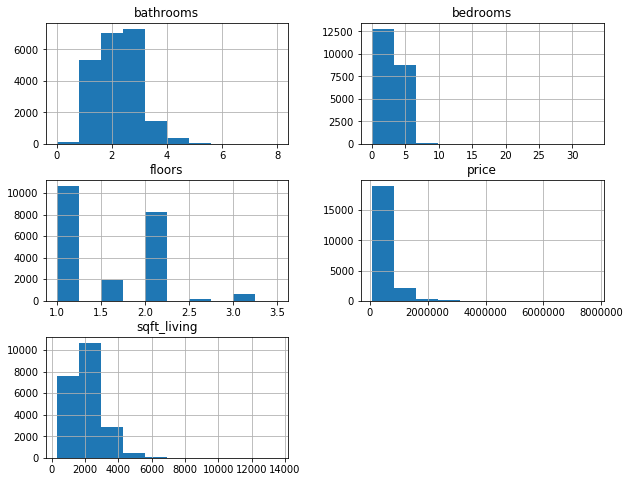

In [7]:
ds.hist(figsize=[10,8])

In [13]:
ds.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

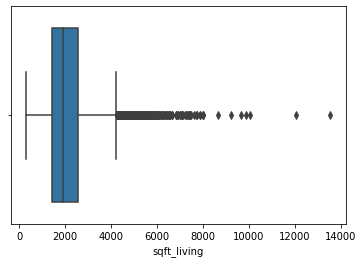

In [8]:
'bedrooms'sns.boxplot(ds['sqft_living'])

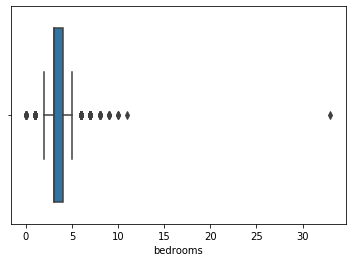

In [14]:
sns.boxplot(ds['bedrooms'])

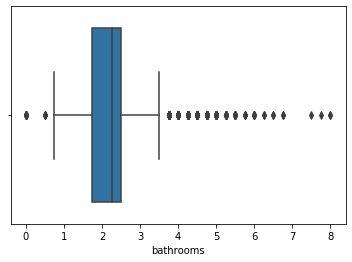

In [15]:
sns.boxplot(ds['bathrooms'])

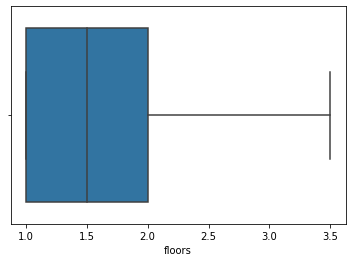

In [19]:
sns.boxplot(ds['floors'])

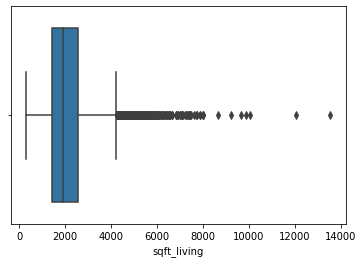

In [12]:
sns.boxplot(ds['sqft_living'])

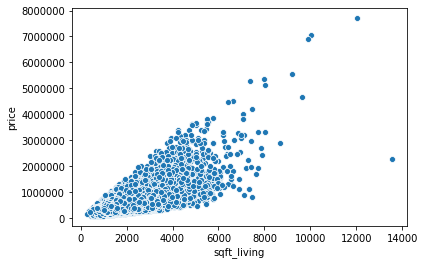

In [26]:
sns.scatterplot(ds['sqft_living'], ds['price'])

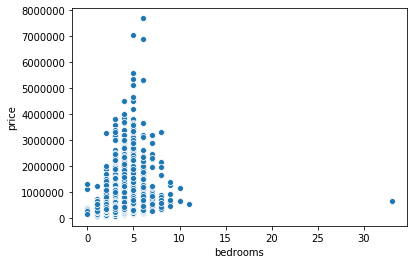

In [27]:
sns.scatterplot(ds['bedrooms'],ds['price'])

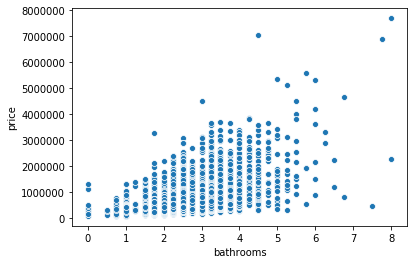

In [28]:
sns.scatterplot(ds['bathrooms'],ds['price'])

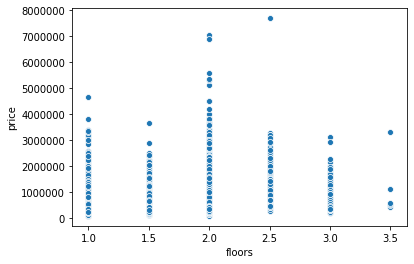

In [29]:
sns.scatterplot(ds['floors'],ds['price'])

In [29]:
ds.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


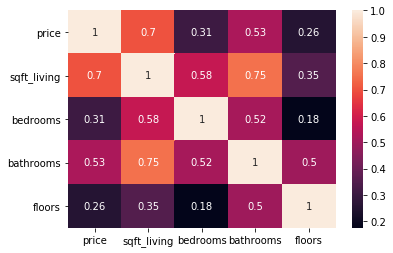

In [71]:
sns.heatmap(ds.corr() , annot=True)

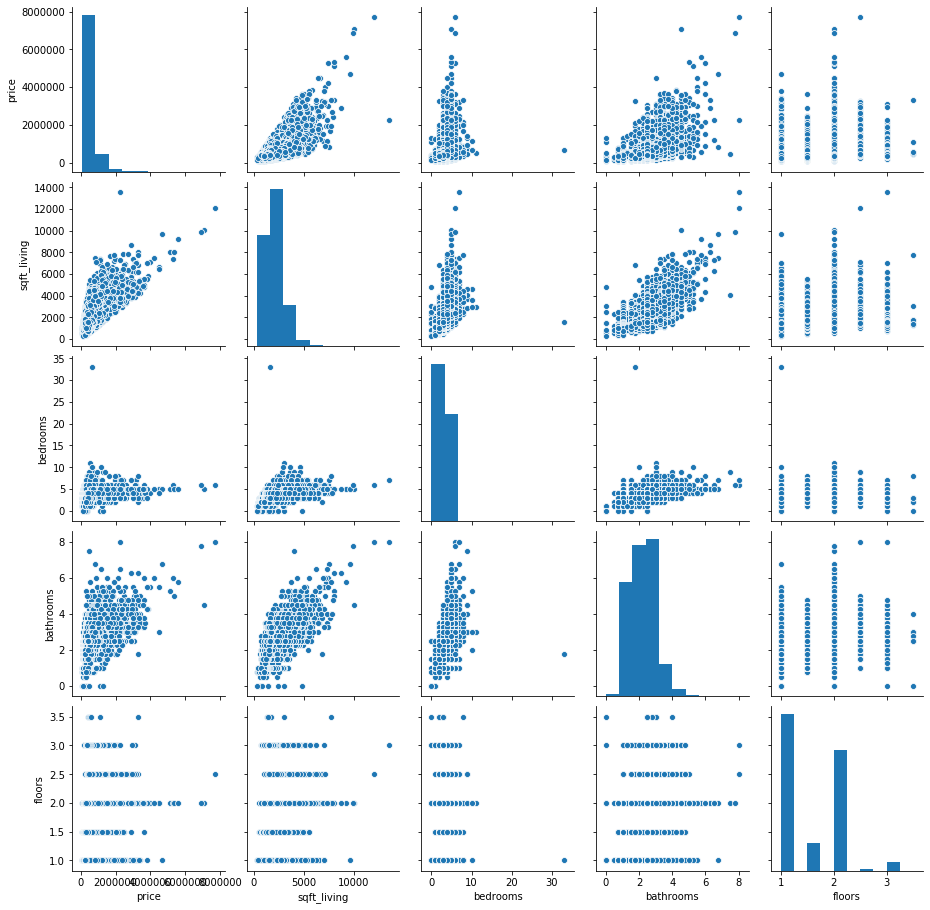

In [33]:
sns.pairplot(ds)

# Linaer Rgression with Square Feet

In [8]:
x = ds.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [9]:
y = ds.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Price')

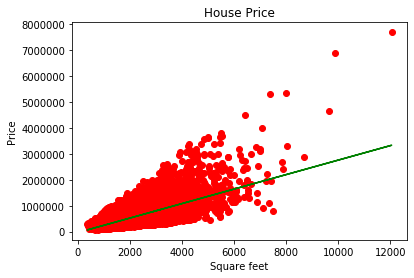

In [13]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,lin_reg.predict(x_train),color='green')
plt.title('House Price')
plt.xlabel('Square feet')
plt.ylabel('Price')

In [16]:
ypred =lin_reg.predict(x_test)
ypred

array([[634568.03728979],
       [567347.10363067],
       [365684.30265331],
       ...,
       [623364.5483466 ],
       [337675.58029534],
       [553342.74245168]])

In [17]:
x_test

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860
...,...
11762,1550
15526,3160
9167,2370
17917,1350


In [22]:
ds[ds.sqft_living==2410].head(1)

,price,sqft_living,bedrooms,bathrooms,floors
1255,600000,2410,2,2.5,1.0


Text(0, 0.5, 'Price')

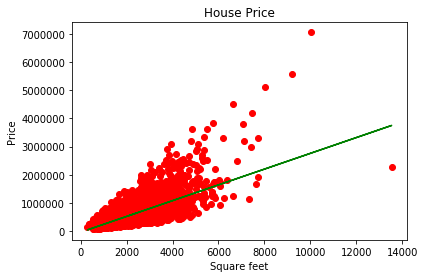

In [24]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,lin_reg.predict(x_test),color='green')
plt.title('House Price')
plt.xlabel('Square feet')
plt.ylabel('Price')

In [25]:
from sklearn.metrics import mean_squared_error , r2_score
rmse = np.sqrt(mean_squared_error(y_test,ypred))
r2 = r2_score(y_test,ypred)
print('R^2:',r2)
print('Root Mean Square Value:', rmse)

R^2: 0.49523542130427234
Root Mean Square Value: 265193.2032329379


# Inference 1:
## Since r^2 = 0.49 , With 1 Square foot there is  49% change in price

# Linear Regression with Bedrooms

In [31]:
x = ds.iloc[:,2:3]
x.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [32]:
y = ds.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Price')

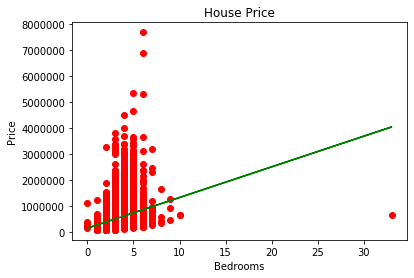

In [35]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,lin_reg.predict(x_train),color='green')
plt.title('House Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

In [37]:
ypred =lin_reg.predict(x_test)
ypred

array([[616043.19942552],
       [497741.24083738],
       [379439.28224924],
       ...,
       [616043.19942552],
       [497741.24083738],
       [616043.19942552]])

In [39]:
x_test

,bedrooms
6638,4
7366,3
3158,2
9117,5
3392,2
...,...
11762,3
15526,4
9167,4
17917,3


In [41]:
ds[ds.bedrooms==4].head(1)

,price,sqft_living,bedrooms,bathrooms,floors
3,604000,1960,4,3.0,1.0


Text(0, 0.5, 'Price')

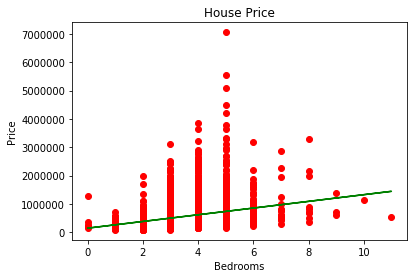

In [36]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,lin_reg.predict(x_test),color='green')
plt.title('House Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,ypred))
r2= r2_score(y_test,ypred)
print(r2)
print(rmse)

0.10373065781231272
353376.1412993047


# Inference 2:
## Since r^2 is 0.1, With 1 Bedroom there is  49% change in price

# Linear Regression with bathrooms

In [46]:
x = ds.iloc[:,3:4]
x.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [47]:
y = ds.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


Text(0, 0.5, 'Price')

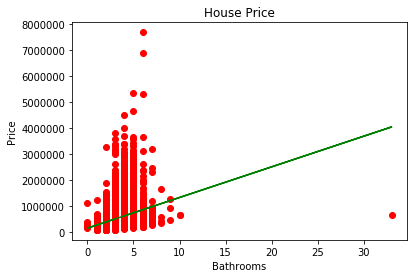

In [48]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,lin_reg.predict(x_train),color='green')
plt.title('House Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
ypred = lin_reg.predict(x_test)
ypred

array([[574606.95934264],
       [387575.68586034],
       [262888.17020547],
       ...,
       [636950.71717008],
       [574606.95934264],
       [449919.44368777]])

In [52]:
x_test

,bathrooms
6638,2.25
7366,1.50
3158,1.00
9117,3.25
3392,1.00
...,...
11762,1.50
15526,2.50
9167,2.50
17917,2.25


In [57]:
ds[ds.bathrooms==2.25].head(1)

,price,sqft_living,bedrooms,bathrooms,floors
1,538000,2570,3,2.25,2.0


Text(0, 0.5, 'Price')

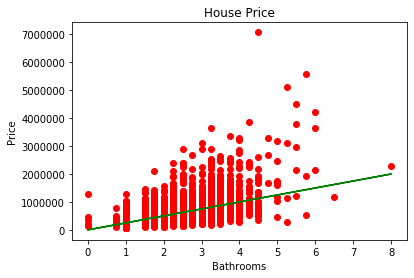

In [58]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,lin_reg.predict(x_test),color='green')
plt.title('House Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,ypred))
r2= r2_score(y_test,ypred)
print(r2)
print(rmse)

0.2729690023991551
318269.0570555351


# Inference 3:
## Since r^2 is 0.2, With 1 Bathroom there is  27% change in price

# Linear Regression with floors

In [61]:
x = ds.iloc[:,4:5]
x.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [63]:
y = ds.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


Text(0, 0.5, 'Price')

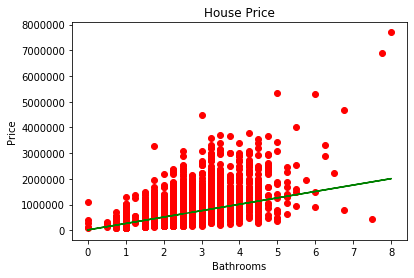

In [64]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,lin_reg.predict(x_train),color='green')
plt.title('House Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
ypred = lin_reg.predict(x_test)
ypred

array([[541759.79092589],
       [455791.82611786],
       [455791.82611786],
       ...,
       [627727.75573391],
       [627727.75573391],
       [541759.79092589]])

In [67]:
x_test

,floors
6638,1.5
7366,1.0
3158,1.0
9117,2.0
3392,1.0
...,...
11762,1.0
15526,2.0
9167,2.0
17917,2.0


In [68]:
ds[ds.floors==1.5].head(1)

,price,sqft_living,bedrooms,bathrooms,floors
12,310000,1430,3,1.0,1.5


Text(0, 0.5, 'Price')

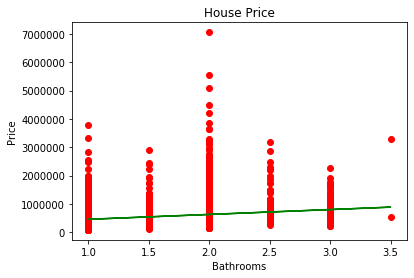

In [69]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,lin_reg.predict(x_test),color='green')
plt.title('House Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,ypred))
r2= r2_score(y_test,ypred)
print(r2)
print(rmse)

0.0687966797810432
360197.09959698736


# Inference 4:
## Since r^2 = 0.068, With 1 Floor there is  49% change in price

# Linear Regression with all variables

In [7]:
x = ds.iloc[:,1:5]
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [8]:
y = ds.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
ypred = lin_reg.predict(x_test)
ypred

array([[609328.77721079],
       [585038.87031192],
       [415562.45223517],
       ...,
       [599102.75434259],
       [339784.19873135],
       [516024.79183523]])

In [13]:
x_test

,sqft_living,bedrooms,bathrooms,floors
6638,2410,4,2.25,1.5
7366,2170,3,1.50,1.0
3158,1450,2,1.00,1.0
9117,4500,5,3.25,2.0
3392,860,2,1.00,1.0
...,...,...,...,...
11762,1550,3,1.50,1.0
15526,3160,4,2.50,2.0
9167,2370,4,2.50,2.0
17917,1350,3,2.25,2.0


In [19]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,ypred))
r2= r2_score(y_test,ypred)
print(r2)
print(rmse)

0.5105722437453338
261133.29646851748


# Inference 5:
## r^2 = 0.51